<a href="https://colab.research.google.com/github/Sarmen-Sinanian/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Sarmen_Sinanian_113_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [1]:
!pip freeze #outputs all libraries along with their versions in this google colab environment

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.1.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.2
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.180
botocore==1.12.180
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.10
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.2
dlib==19.16.0
dm-sonnet==1.33
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy

In [2]:
!pip install pandas==0.23.4 #uninstalls current version of pandas, then reinstalls pandas 0.23.4; MUST RESTART RUNTIME AFTER THE FACT

     |████████████████████████████████| 8.9MB 4.9MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import pandas as pd
import numpy as np

In [0]:
url = "https://raw.githubusercontent.com/Sarmen-Sinanian/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv"

In [0]:
df = pd.read_csv(url)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
Unnamed: 0       1200 non-null int64
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(4)
memory usage: 37.6 KB


In [5]:
df.shape

(1200, 4)

In [6]:
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [7]:
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [0]:
age_bins = pd.cut(df['age'], 2)
weight_bins = pd.cut(df['weight'],2)
exercise_bins = pd.cut(df['exercise_time'],6)

In [9]:
pd.crosstab(age_bins, weight_bins, normalize='index')


weight,"(99.854, 173.0]","(173.0, 246.0]"
age,,
"(17.938, 49.0]",0.760383,0.239617
"(49.0, 80.0]",0.653310,0.346690


In [10]:
pd.crosstab(exercise_bins, weight_bins, normalize='index')

weight,"(99.854, 173.0]","(173.0, 246.0]"
exercise_time,,
"(-0.3, 50.0]",0.448133,0.551867
"(50.0, 100.0]",0.575758,0.424242
"(100.0, 150.0]",0.654639,0.345361
"(150.0, 200.0]",0.826316,0.173684
"(200.0, 250.0]",0.974194,0.025806
"(250.0, 300.0]",1.000000,0.000000


In [11]:
pd.crosstab(age_bins, exercise_bins, normalize='index')

exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
age,,,,,,
"(17.938, 49.0]",0.166134,0.170927,0.138978,0.180511,0.174121,0.169329
"(49.0, 80.0]",0.238676,0.273519,0.186411,0.134146,0.080139,0.087108


In [0]:
#CREATE BINARY VARIABLE COLUMN WITH TRUE/FALSE FOR ABOVE 40 BELOW 40 WITH AGE BEING CONFOUNDING, EXERCISE GREATER THAN 

In [0]:
# df['age_18_to_49.9'] = (df.age < 50).astype(int)

In [0]:
df['age_18_to_39.9'] = (df.age < 40)

In [0]:
df['exercise_150_to_300'] = (df.exercise_time >= 150)

In [16]:
df.head(100)

,Unnamed: 0,age,weight,exercise_time,age_18_to_39.9,exercise_150_to_300
0,0,44,118,192,False,True
1,1,41,161,35,False,False
2,2,46,128,220,False,True
3,3,39,216,57,True,False
4,4,28,116,182,True,True
5,5,58,103,165,False,True
6,6,55,161,107,False,False
7,7,21,188,37,True,False
8,8,55,216,79,False,False
9,9,50,127,267,False,True


In [17]:
pd.crosstab(df['age_18_to_39.9'], df['exercise_150_to_300'],)

exercise_150_to_300,False,True
age_18_to_39.9,,
False,483,270
True,214,233


In [0]:

# pd.crosstab(age_bins, exercise_bins)

In [0]:
# pd.crosstab(age_bins, [weight_bins, exercise_bins], normalize='index')

In [20]:
pd.crosstab(df['age_18_to_39.9'], [weight_bins, exercise_bins], normalize='index')

weight         (99.854, 173.0]      ...       (173.0, 246.0]
exercise_time     (-0.3, 50.0]      ...       (200.0, 250.0]
age_18_to_39.9                      ...                     
False                 0.096946      ...             0.003984
True                  0.078300      ...             0.002237

[2 rows x 11 columns]

In [21]:
pd.crosstab(df['age_18_to_39.9'], [weight_bins, df['exercise_150_to_300']], normalize='index')#BEST CROSS TAB

weight              (99.854, 173.0]           (173.0, 246.0]          
exercise_150_to_300           False     True           False     True 
age_18_to_39.9                                                        
False                      0.350598  0.330677       0.290837  0.027888
True                       0.270694  0.485459       0.208054  0.035794

In [0]:
ct = pd.crosstab(df['age_18_to_39.9'], [weight_bins, df['exercise_150_to_300']], normalize='index')

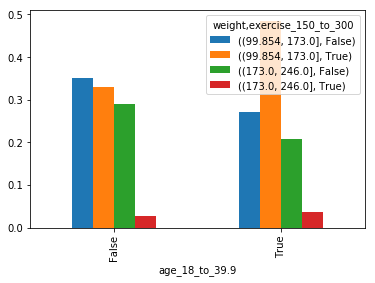

In [23]:
ct.plot(kind='bar'); #EH

In [0]:
# create some random data; replace that by your actual dataset

# data = pd.DataFrame(ct, columns=['A', 'B', 'C', 'D', 'E'], index = range(2000, 2011, 1))

# plot heatmap

# ax = sns.heatmap(data.T)

# turn the axis label

# # for item in ax.get_yticklabels():
#     item.set_rotation(0)

# # for item in ax.get_xticklabels():
#     item.set_rotation(90)

# save figure

# plt.savefig('seabornPandas.png', dpi=100)
# plt.show()

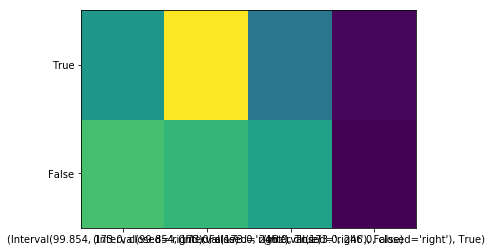

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

age_bins_10 = pd.cut(df['age'], 10)
weight_bins_10 = pd.cut(df['weight'],10)
exercise_bins_10 = pd.cut(df['exercise_time'],10)

# Index= [age_bins_10]
# Cols = [weight_bins_10]
# df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

plt.pcolor(ct)
plt.yticks(np.arange(0.5, len(ct.index), 1), ct.index)
plt.xticks(np.arange(0.5, len(ct.columns), 1), ct.columns)
plt.show();



In [0]:
# pd.crosstab(age_bins, exercise_bins, weight_bins, aggfunc='count')

In [0]:
# import pandas as pd
# #ADD INDEX COLUMN
# # persons_data_url = 'https://github.com/Sarmen-Sinanian/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/persons_edited.csv'

# from google.colab import files
# uploaded = files.upload()

# # df = pd.read_csv(uploaded, header=None, error_bad_lines=False)

# df = pd.read_csv("Age-Weight-Exercise.txt", header=None)


In [0]:

# df = pd.read_csv("Age-Weight-Exercise.txt", header=None)
# # df = pd.DataFrame(uploaded, index=[10000])

# df.head(1000)

In [0]:
# df.replace("b'", "a", inplace=True)

In [0]:
# df1 = pd.read_csv(df, sep="|", names=["Age", "Weight", "Exercise time"])

In [0]:
# df.columns = ['Age', 'Weight','Exercise Time']

# columns = ['Age', 'Weight','Exercise Time']

# persons_data = pd.read_csv(df, names=columns)




### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)